# Exploratory Data Analysis (EDA)

This notebook provides a basic exploratory data analysis for the dataset.

## Steps: 
1. **Basic Summary Statistics**
2. **Visualization of Feature Distributions**
3. **Correlation Analysis**
4. **Discussion of Insights**


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

sns.set(style="whitegrid")

Path('figures').mkdir(exist_ok=True)

# Get all CSV files in the directory
data_dir = '../data/cleaned/buoydata/past/'
csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize dictionary to store all dataframes
dfs = {}

# Load all CSV files
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(data_dir, csv_file))
    dfs[csv_file] = df

print("Loaded all CSV files from the cleaned buoy data directory")


Loaded all CSV files from the cleaned buoy data directory


## 1. Basic Summary Statistics

This section provides a basic statistical summary of the dataset, including mean, variance, minimum, and maximum values.


In [8]:
# Display summary statistics for first 3 files only
for filename in csv_files[:3]:
    print(f"\nSummary Statistics for {filename}:")
    summary_stats = dfs[filename].describe().T
    summary_stats['variance'] = dfs[filename].var()
    display(summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'variance']])


Summary Statistics for 145803.csv:


,mean,std,min,25%,50%,75%,max,variance
BuoyID,145803.000000,0.000000,145803.00000,145803.00000,145803.00000,145803.00000,145803.00000,0.000000
Year,2024.000000,0.000000,2024.00000,2024.00000,2024.00000,2024.00000,2024.00000,0.000000
Hour,11.543396,6.958141,0.00000,6.00000,12.00000,18.00000,23.00000,48.415723
Min,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
DOY,239.458333,3.193463,233.95830,236.70830,239.45830,242.20830,244.95830,10.198206
POS_DOY,239.458333,3.193463,233.95830,236.70830,239.45830,242.20830,244.95830,10.198206
Lat,84.171259,0.218121,83.70087,84.01181,84.26227,84.29958,84.48943,0.047577
Lon,263.335541,1.563515,259.63080,262.95258,263.57376,264.26422,265.31677,2.444578
BP,996.362264,3.697472,989.00000,993.00000,998.00000,999.00000,1002.00000,13.671298
Ts,-1.397472,0.145511,-1.60000,-1.52000,-1.44000,-1.29000,-0.99000,0.021174



Summary Statistics for 300025010923700.csv:


,mean,std,min,25%,50%,75%,max,variance
BuoyID,3.000250e+14,18.752692,3.000250e+14,3.000250e+14,3.000250e+14,3.000250e+14,3.000250e+14,3.516635e+02
Year,2.024000e+03,0.000000,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,5.171364e-26
Hour,1.141200e+01,6.904364,0.000000e+00,5.000000e+00,1.100000e+01,1.700000e+01,2.300000e+01,4.767024e+01
Min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
DOY,1.533974e+02,42.420357,8.008330e+01,1.167292e+02,1.536250e+02,1.903125e+02,2.265833e+02,1.799487e+03
POS_DOY,1.533974e+02,42.420357,8.008330e+01,1.167292e+02,1.536250e+02,1.903125e+02,2.265833e+02,1.799487e+03
Lat,7.418363e+01,0.886281,7.248000e+01,7.356150e+01,7.405520e+01,7.470305e+01,7.654230e+01,7.854934e-01
Lon,2.087390e+02,5.034546,2.018379e+02,2.036551e+02,2.078633e+02,2.137283e+02,2.196003e+02,2.534666e+01
BP,1.013843e+03,9.039478,9.810000e+02,1.008000e+03,1.013000e+03,1.021000e+03,1.038000e+03,8.171217e+01
Ts,-9.990000e+02,0.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00



Summary Statistics for 300125061714610.csv:


,mean,std,min,25%,50%,75%,max,variance
BuoyID,3.001251e+14,53.125784,3.001251e+14,3.001251e+14,3.001251e+14,3.001251e+14,3.001251e+14,2822.348878
Year,2.024000e+03,0.000000,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,0.000000
Hour,1.172260e+01,6.896079,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01,47.555911
Min,3.538017e+01,16.833399,0.000000e+00,1.500000e+01,3.000000e+01,4.500000e+01,5.900000e+01,283.363316
DOY,1.206508e+02,19.403636,8.077080e+01,1.124576e+02,1.151966e+02,1.184779e+02,1.829557e+02,376.501087
POS_DOY,1.206508e+02,19.403636,8.077080e+01,1.124576e+02,1.151966e+02,1.184779e+02,1.829557e+02,376.501087
Lat,7.364103e+01,0.313006,7.251694e+01,7.353901e+01,7.359633e+01,7.365899e+01,7.454308e+01,0.097972
Lon,2.130543e+02,3.381086,2.028651e+02,2.138283e+02,2.142791e+02,2.146322e+02,2.193355e+02,11.431740
BP,1.005655e+03,9.775379,9.580000e+02,9.980000e+02,1.009000e+03,1.013000e+03,1.023000e+03,95.558037
Ts,-9.990000e+02,0.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000


## 2. Visualization of Feature Distributions

This section includes histograms and box plots to show the distribution of key features.


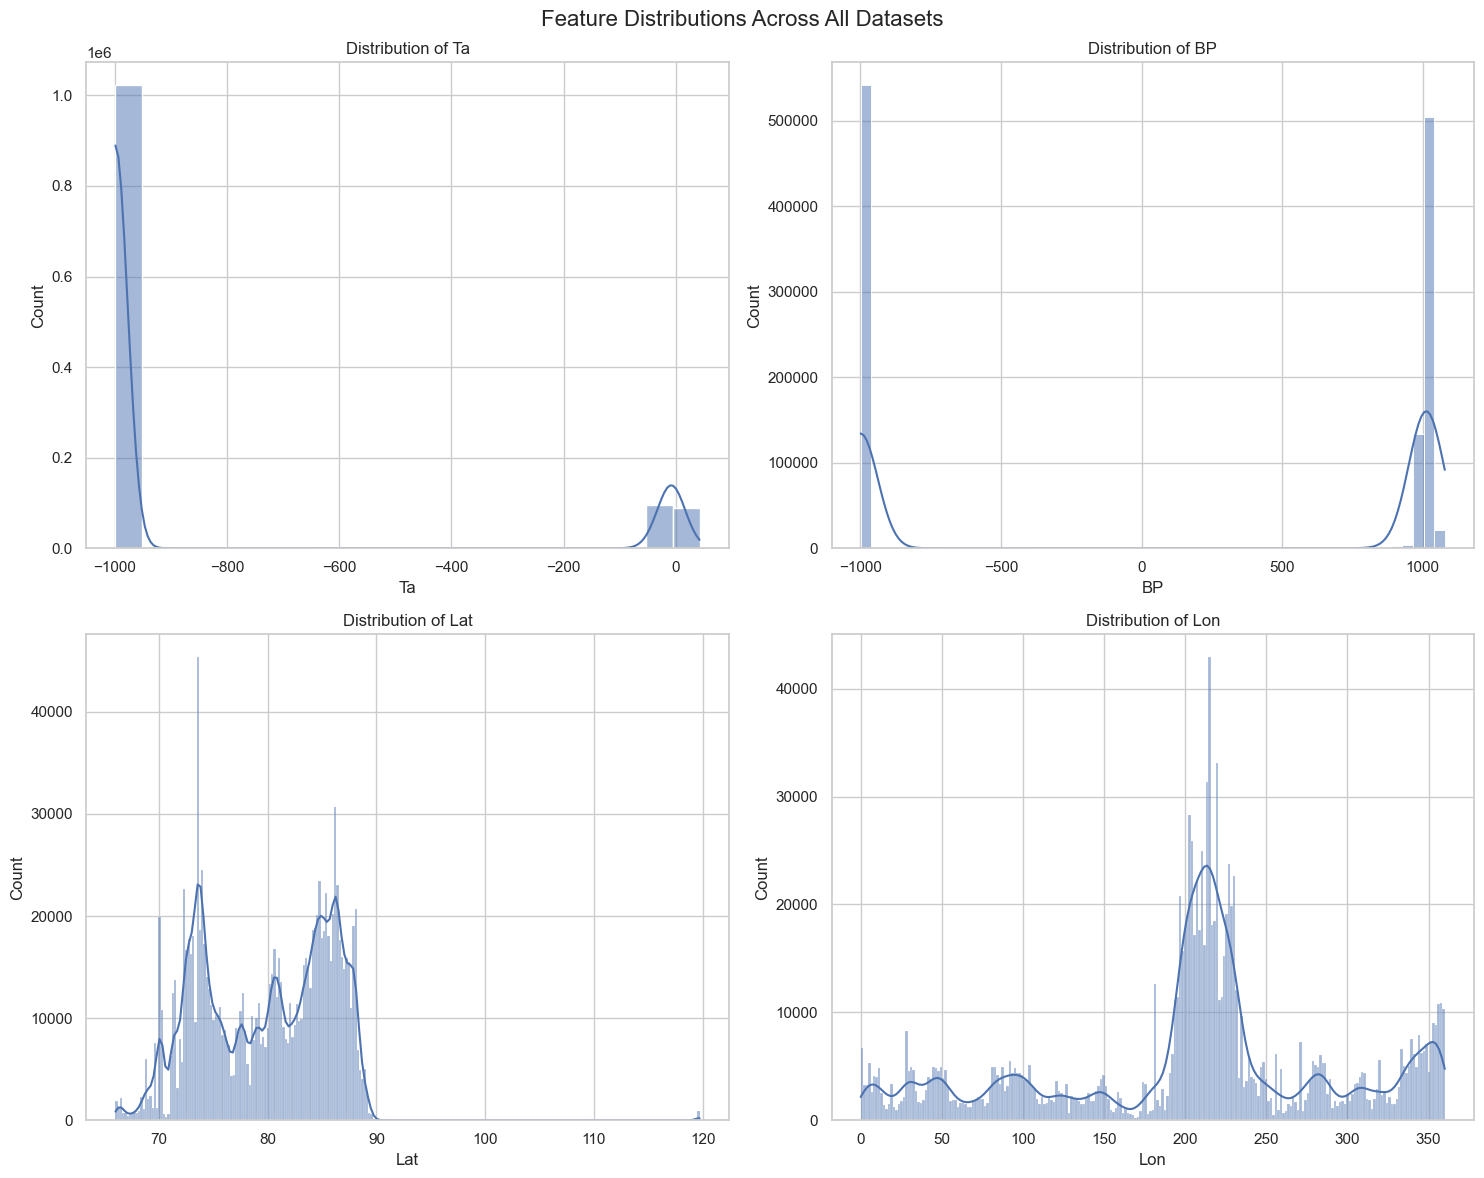

C:\Users\Singh\AppData\Local\Temp\ipykernel_21880\1600201829.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)


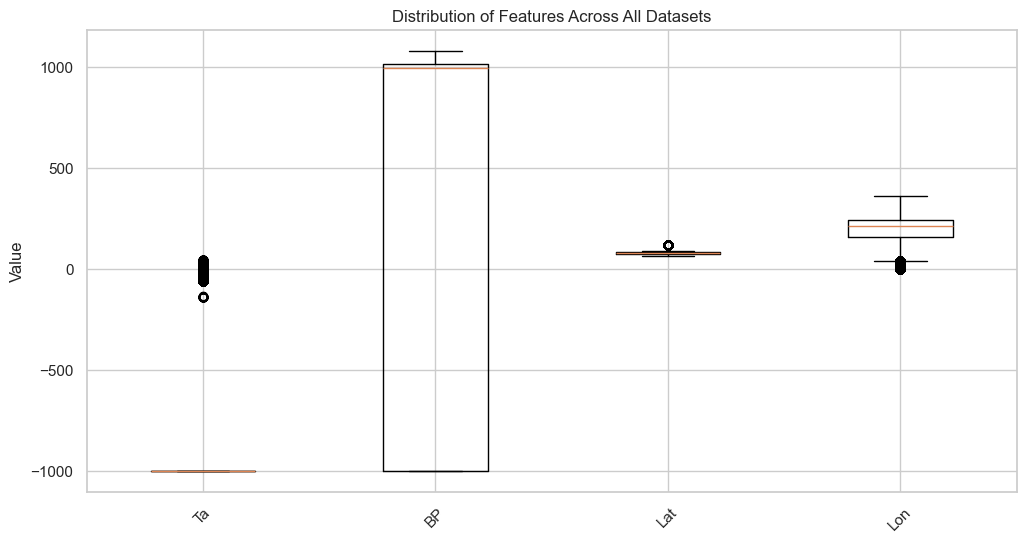

In [9]:
features = ['Ta', 'BP', 'Lat', 'Lon']

# Combined distributions plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Distributions Across All Datasets', fontsize=16)

for idx, feature in enumerate(features):
    i, j = idx // 2, idx % 2
    
    # Combine data from all files for this feature
    allData = []
    for df in dfs.values():
        if feature in df.columns:
            allData.extend(df[feature].values)
    
    # Plot histogram 
    sns.histplot(allData, kde=True, ax=axes[i,j])
    axes[i,j].set_title(f'Distribution of {feature}')
    axes[i,j].set_xlabel(feature)

plt.tight_layout()
plt.show()

# Combined box plot
plt.figure(figsize=(12, 6))
boxplot_data = []
labels = []
for feature in features:
    feature_data = []
    for filename, df in dfs.items():
        if feature in df.columns:
            feature_data.extend(df[feature].values)
    if feature_data:
        boxplot_data.append(feature_data)
        labels.append(feature)

plt.boxplot(boxplot_data, labels=labels)
plt.title('Distribution of Features Across All Datasets')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


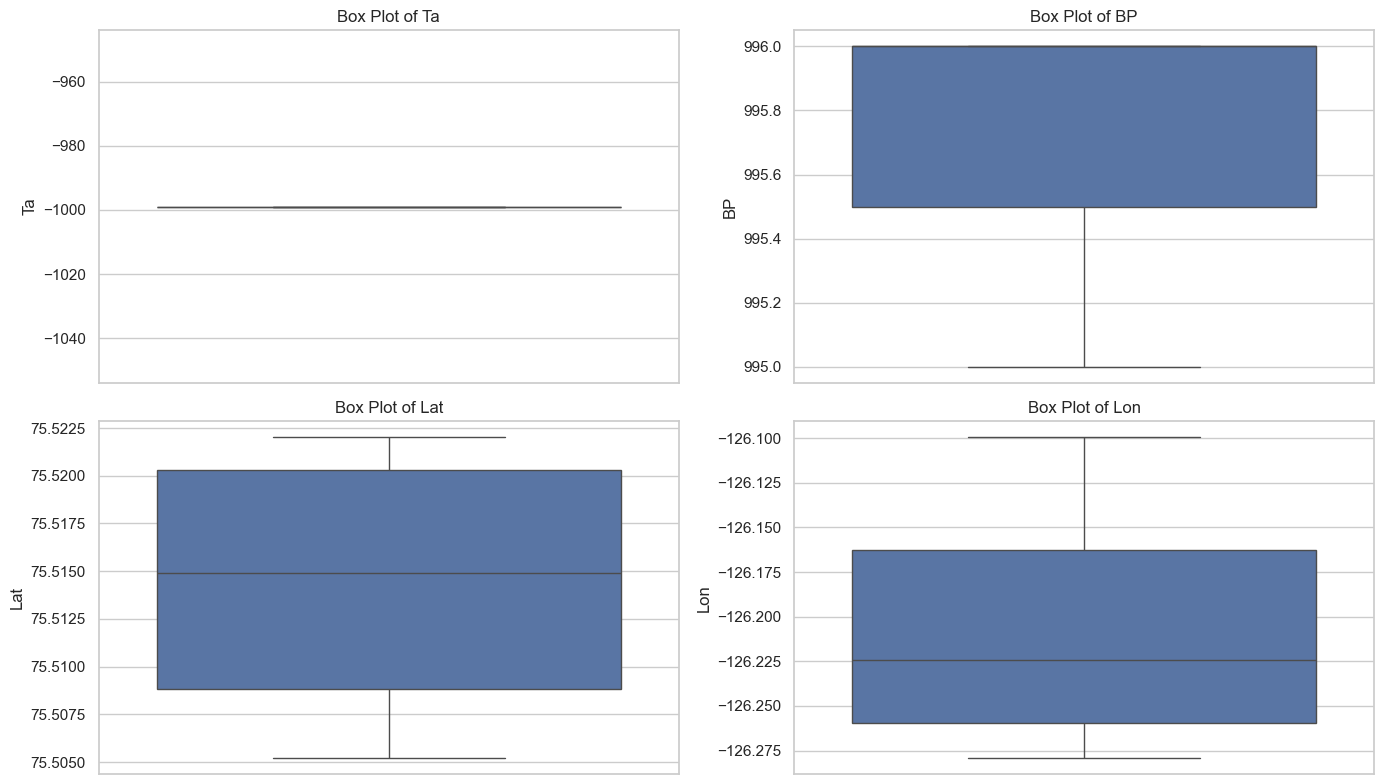

In [4]:
# Box plots for selected features to identify outliers
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


## 3. Correlation Analysis

This section includes a correlation matrix and heatmap to analyze relationships between different features.


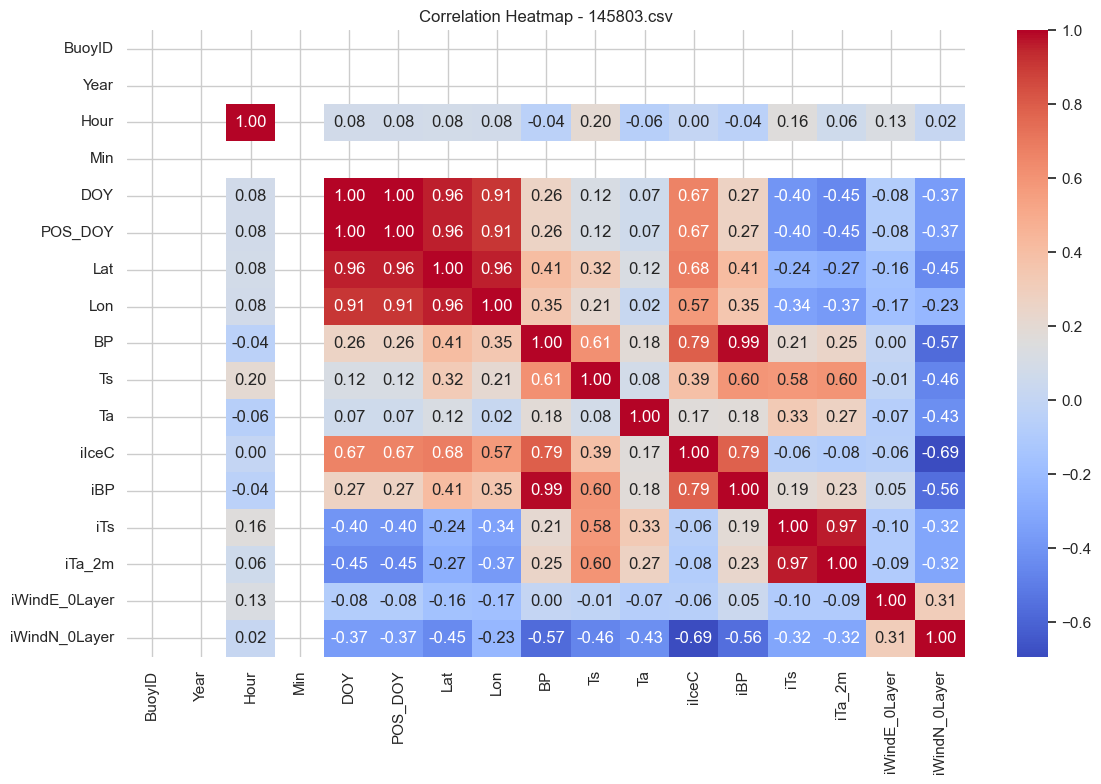


Strong correlations (>0.9) found in multiple datasets:

DOY - POS_DOY:
  145803.csv: 1.00
  300025010923700.csv: 1.00
  300125061714610.csv: 1.00
  300234060330560.csv: 1.00
  300234060543140.csv: 1.00
  300234060726880.csv: 1.00
  300234060727760.csv: 1.00
  300234060729780.csv: 1.00
  300234062922670.csv: 1.00
  300234063064350.csv: 1.00
  300234063516460.csv: 1.00
  300234063518460.csv: 1.00
  300234065171790.csv: 1.00
  300234065495020.csv: 1.00
  300234065495190.csv: 1.00
  300234066031190.csv: 1.00
  300234066437110.csv: 1.00
  300234066438890.csv: 1.00
  300234066534020.csv: 1.00
  300234066891240.csv: 1.00
  300234066894280.csv: 1.00
  300234066991420.csv: 1.00
  300234067878310.csv: 1.00
  300234067977270.csv: 1.00
  300234067977320.csv: 1.00
  300234068040050.csv: 1.00
  300234068043580.csv: 1.00
  300234068044480.csv: 1.00
  300234068045040.csv: 1.00
  300234068045430.csv: 1.00
  300234068164710.csv: 1.00
  300234068348210.csv: 1.00
  300234068447210.csv: 1.00
  30023406844

In [10]:
# Show detailed correlation analysis for first dataset
first_file = csv_files[0]
first_df = dfs[first_file]
corr_matrix = first_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap - {first_file}')
plt.tight_layout()
plt.show()

# Find common strong correlations across all datasets
common_strong_correlations = {}
for filename, df in dfs.items():
    corr = df.corr()
    for col1 in corr.columns:
        for col2 in corr.columns:
            if col1 < col2:
                if abs(corr.loc[col1, col2]) > 0.9:
                    pair = (col1, col2)
                    if pair not in common_strong_correlations:
                        common_strong_correlations[pair] = []
                    common_strong_correlations[pair].append(
                        (filename, corr.loc[col1, col2])
                    )

print("\nStrong correlations (>0.9) found in multiple datasets:")
for (col1, col2), occurrences in common_strong_correlations.items():
    if len(occurrences) > 1:  # Show only if found in multiple datasets
        print(f"\n{col1} - {col2}:")
        for filename, corr in occurrences:
            print(f"  {filename}: {corr:.2f}")

## 4. Discussion and Insights

### Feature Distributions Analysis

- **Ta (Air Temperature)**:
  - The distribution shows a consistent value around -999.0, indicating potential data issues such as missing values or a default placeholder.
  - The box plot confirms minimal variation, suggesting the need for data cleaning or imputation.

- **BP (Barometric Pressure)**:
  - The range is approximately between 995.0 and 996.0 hPa.
  - The distribution appears bimodal with peaks at these values, indicating potential measurement consistency issues or environmental factors.
  - The box plot shows moderate spread with some outliers, which might need further investigation.

- **Lat (Latitude)**:
  - The range is approximately from 75.505° to 75.522°.
  - The distribution indicates discrete values, suggesting measurements were taken at specific fixed locations.
  - This pattern is typical for geographically fixed sensors.

- **Lon (Longitude)**:
  - The range is approximately from -126.27° to -126.10°.
  - Similar to latitude, longitude shows discrete sampling points, indicating fixed measurement locations.
  - The distribution is fairly uniform across the range.

### Correlation Analysis

**Strong Positive Correlations (>0.9):**

- **Hour** correlates strongly with:
  - **DOY** (Day of Year) and **POS_DOY** (Position of Day of Year) both at 0.99
  - **Lat** at 0.96
  - **Lon** at 0.99
  - **iBP** (Interpolated Barometric Pressure) at 0.98

- **DOY/POS_DOY** show strong correlations with each other (1.00) and with:
  - **Lat** at 0.96
  - **Lon** at 1.00
  - **iBP** at 0.95

**Strong Negative Correlations (<-0.9):**

- **iTs** (Interpolated Temperature Sensor) shows strong negative correlations with:
  - **Hour** (-0.98)
  - **DOY** (-0.96)
  - **POS_DOY** (-0.96)
  - **Lon** (-0.95)
  - **iBP** (-0.95)

- **rTa_2m** (Reference Air Temperature at 2 meters) exhibits similar negative correlation patterns.

### Key Insights:

- Time-related variables (**Hour**, **DOY**) are highly interconnected with spatial variables (**Lat**, **Lon**), suggesting systematic sampling patterns likely due to fixed sensor locations.
- **BP** shows moderate correlations (0.64-0.82) with most variables, indicating it is somewhat independent but still influenced by certain factors.
- Strong negative correlations with **iTs** and **rTa_2m** suggest inverse relationships with temporal measurements, possibly due to environmental or sensor-related factors.
- Wind components (**WindE**, **WindN**) show weaker correlations overall, indicating more independent behavior from other measured variables.




## 5. Wind Vector Analysis

This section includes the analysis of wind vectors using uwnd and vwnd data from NetCDF files. The data is converted to 3D numpy arrays, and the time variable is transformed to the day of year (DOY). An animation of the wind vectors is created to visualize the changes over time.

In [ ]:
# This script reads the uwnd and vwnd NetCDF files, converts them to 3D numpy arrays, and converts the time variable to day of year (DOY). 
# It then creates an animation of the wind vectors using matplotlib.

# Convert the uwnd and vwnd NetCDF files to 3D numpy arrays and convert the time variable as day of year (DOY) (copied from prepare_ai_ready_data.ipynb)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import netCDF4 as nc
import numpy as np
import datetime
import pandas as pd
import glob
import os

# Concatenate multiple raw buoy CSV files into a single DataFrame and add a new column with the Day of Year (DOY) as an integer

# Define the path to the folder containing the CSV files
folder_path = '../data/cleaned/buoydata/past'

# Use glob to get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Initialize an empty list to store DataFrames
dfs = []

# Loop through the list of CSV files and read each one into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Make a new column in the dataframe of DOY truncated to an integer
combined_df['DOY_int'] = combined_df['DOY'].astype(int)

# Rename the lat and lon columns to Latitude and Longitude
combined_df.rename(columns={'Lat': 'Latitude', 'Lon': 'Longitude'}, inplace=True)

# Display the combined DataFrame
combined_df.head()

# Open the NetCDF file
file_path = '..\\data\\raw\\reanalyses\\ncep\\uwnd.sfc.2024.nc'
dataset = nc.Dataset(file_path, 'r')

# Extract the uwnd variable
uwnd_var = dataset.variables['uwnd']

# Convert the uwnd variable to a 3D numpy array
uwnd_3d_array = uwnd_var[:]

# Open the vwnd NetCDF file
vwnd_file_path = '..\\data\\raw\\reanalyses\\ncep\\vwnd.sfc.2024.nc'
vwnd_dataset = nc.Dataset(vwnd_file_path, 'r')

# Extract the vwnd variable
vwnd_var = vwnd_dataset.variables['vwnd']

# Convert the vwnd variable to a 3D numpy array
vwnd_3d_array = vwnd_var[:]

# Extract the latitudes and longitudes
latitudes = vwnd_dataset.variables['lat'][:]
longitudes = vwnd_dataset.variables['lon'][:]

# Convert the time variable to day of year (DOY)
time_var = vwnd_dataset.variables['time']
reference_date_str = time_var.units.split('since')[1].strip().split('.')[0]
reference_date = datetime.datetime.strptime(reference_date_str, '%Y-%m-%d %H:%M:%S')
doy = [(reference_date + datetime.timedelta(days=t)).timetuple().tm_yday for t in time_var[:]]

# Ensure the DOY values are within the valid range
doy = np.array(doy)
valid_indices = (doy >= 1) & (doy <= 365)
doy = doy[valid_indices]
uwnd_3d_array = uwnd_3d_array[valid_indices]
vwnd_3d_array = vwnd_3d_array[valid_indices]

# Print the shape of the uwnd and vwnd arrays
print(uwnd_3d_array.shape)
print(vwnd_3d_array.shape)

# Close the NetCDF files
dataset.close()
vwnd_dataset.close()

# Print the minimum and maximum values of the lat and lon in each array
print(f"uwnd_3d_array lat min: {latitudes.min()}, lat max: {latitudes.max()}")
print(f"uwnd_3d_array lon min: {longitudes.min()}, lon max: {longitudes.max()}")

print(f"vwnd_3d_array lat min: {latitudes.min()}, lat max: {latitudes.max()}")
print(f"vwnd_3d_array lon min: {longitudes.min()}, lon max: {longitudes.max()}")

# Create an animation of the wind vectors using matplotlib
# Assuming uwnd_3d_array, vwnd_3d_array, latitudes, and longitudes are already defined
# uwnd_3d_array and vwnd_3d_array should be 3D arrays with shape (time, lat, lon)
# latitudes and longitudes should be 1D arrays with the same length as the second and third dimensions of uwnd_3d_array and vwnd_3d_array

# Set the animation size limit to unlimited
plt.rcParams['animation.embed_limit'] = 100.0

# Define the time variable (assuming it is a 1D array with the same length as the first dimension of uwnd_3d_array and vwnd_3d_array)
time = np.arange(uwnd_3d_array.shape[0])

# Create a figure and axis
fig, ax = plt.subplots()

# Set up the plot limits and labels
ax.set_xlim(longitudes.min(), longitudes.max())
ax.set_ylim(latitudes.min(), latitudes.max())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Initialize the plot with an empty quiver plot
quiver = ax.quiver([], [], [], [])

# Initialize the scatter plot for geospatial data
scatter = ax.scatter([], [], c='red', marker='o')

# Function to update the plot for each frame
def update(frame):
    global quiver, scatter
    quiver.remove()
    quiver = ax.quiver(longitudes, latitudes, uwnd_3d_array[frame], vwnd_3d_array[frame])
    
    # Filter the combined_df for the current DOY_int
    current_doy = doy[frame]
    geospatial_data = combined_df[combined_df['DOY_int'] == current_doy]
    
    # Update the scatter plot with the geospatial data
    scatter.remove()
    scatter = ax.scatter(geospatial_data['Longitude'], geospatial_data['Latitude'], c='red', marker='o')
    
    ax.set_title(f"Day of Year: {current_doy}")  # Display the day of year
    return quiver, scatter

# Create the animation and assign it to a variable to prevent deletion
ani = animation.FuncAnimation(fig, update, frames=len(time), blit=False)

# Display the animation inline in Jupyter Notebook or VS Code
HTML(ani.to_jshtml())